# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA AQUÍ TU RESPUESTA**
Me ayudaría para resolver la problemática planteada poder contar con datos de propiedades vendidas o tasadas en las zonas de interés. Sera necesario que este set de datos detalle el precio de cada propiedad y que disponga de información detallada de las mismas (por nombrar algunos ejemplos de atributos que serían de utilidad disponer: Tipo de Propiedad, Superficie de la propiedad, Cantidad de habitaciones que dispone la propiedad, Cantidad de baños, Ubicación, Ubicación geográfica). Con un set de datos que contenga esta información podremos construir un modelo de software con Machine Learning que nos ayude a predecir las valuaciones de otras propiedades de las cuales deseamos conocer su precio/tasación. 

Al analizar estos datos buscare aquellas variables, atributos de la propiedad, que estén correlacionadas con su precio. Estos serán de gran utilidad para entrenar y probar modelos de regresión de machine learning que nos ayuden a predecir precios/tasaciones.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

* Cargo el dataset en la variable datos_propiedades

In [2]:
datos_propiedades=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

* Imprimo cantidad de filas y columnas del dataset

In [3]:
print('Cantidad de filas y columnas del dataset', datos_propiedades.shape, '\n')

Cantidad de filas y columnas del dataset (146660, 19) 



* Veo el tamaño del dataset

In [4]:
datos_propiedades.size

2786540

* Ahora imprimo las primeras 5 instancias del dataset

In [5]:
datos_propiedades.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


* Analizo de que tipo de datos estan compuestas cada columnas

In [6]:
datos_propiedades.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

* Imprimo todos los nombres de las columnas y los valores faltantes para cada una

In [7]:
datos_propiedades.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* A continuación, grafico histogramas para las variables numéricas (Ambientes, habitaciones, baños, superficies, Precio)

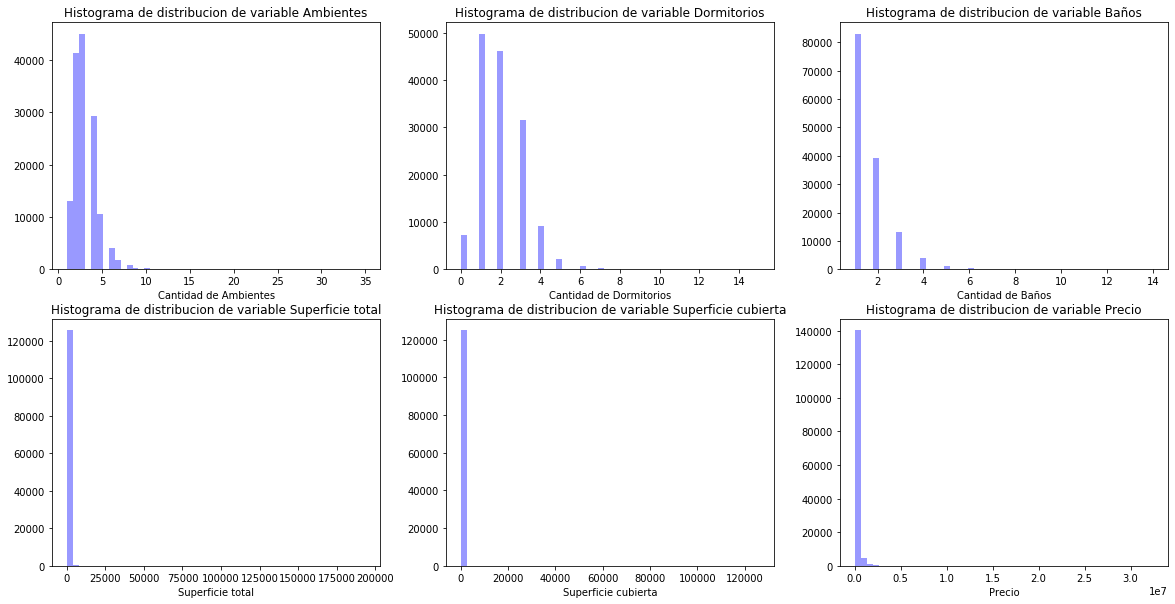

In [8]:
fig = plt.figure(figsize = (20, 10))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0,0])
ax1=sns.distplot(datos_propiedades.rooms, kde=False, color="b")
plt.xlabel('Cantidad de Ambientes')
plt.title('Histograma de distribucion de variable Ambientes')
ax2 = fig.add_subplot(gs[0,1])
ax2=sns.distplot(datos_propiedades.bedrooms, kde=False, color="b")
plt.xlabel('Cantidad de Dormitorios')
plt.title('Histograma de distribucion de variable Dormitorios')
ax3 = fig.add_subplot(gs[0,2])
ax3=sns.distplot(datos_propiedades.bathrooms, kde=False, color="b")
plt.xlabel('Cantidad de Baños')
plt.title('Histograma de distribucion de variable Baños')
ax4 = fig.add_subplot(gs[1,0])
ax4=sns.distplot(datos_propiedades.surface_total, kde=False, color="b")
plt.xlabel('Superficie total')
plt.title('Histograma de distribucion de variable Superficie total')
ax5 = fig.add_subplot(gs[1,1])
ax5=sns.distplot(datos_propiedades.surface_covered, kde=False, color="b")
plt.xlabel('Superficie cubierta')
plt.title('Histograma de distribucion de variable Superficie cubierta')
ax6 = fig.add_subplot(gs[1,2])
ax6=sns.distplot(datos_propiedades.price, kde=False, color="b")
plt.xlabel('Precio')
plt.title('Histograma de distribucion de variable Precio')
plt.show()

Los histogramas de las variables Ambientes, Dormitorios y Baños muestran la forma de la distribución de la concentración de sus muestras dentro del dataset.
Luego al analizar los histogramas de las variables superficie total, superficie cubierta y precio observo que no ofrecen una buena representación visual posiblemente por valores extremos o valores atípicos. 
Más adelante en el análisis exploratorio de los datos, profundizare sobre estas variables para ver su comportamiento y que datos contienen. Ver sus valores estadísticos, su distribución y analizar valores atípicos que puedan distorsionar la muestra y su interpretación.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

* Comienzo filtrando por la variable categorica "Tipo de propiedad" y cuento cuantas instancias tengo por cada uno de los tipos.

In [9]:
tipos_de_propiedades=pd.value_counts(datos_propiedades['property_type'], sort=True)
print('Cantidad de tipos de propiedades',tipos_de_propiedades.shape,'\n') #Imprime cant. de tipos de propiedades
print('Cantidad de instancias por cada tipo de propiedad','\n')
print(tipos_de_propiedades,'\n')#Imprime los tipos de propiedades y la cantidad de instancias 
                                #de cada una contenidad en el dataset

Cantidad de tipos de propiedades (10,) 

Cantidad de instancias por cada tipo de propiedad 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64 



* Ahora grafico, con un countplot de Seaborn, la cantidad de instancias por cada tipo de propiedad

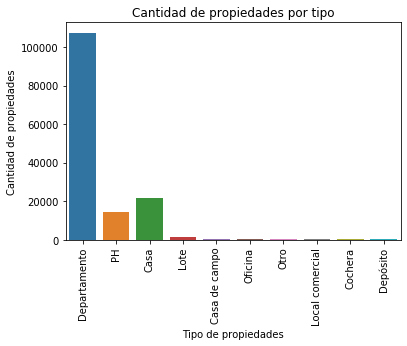

In [10]:
grafico_cant_tipo_prop=sns.countplot(data = datos_propiedades, x = 'property_type')
grafico_cant_tipo_prop.set_xticklabels(grafico_cant_tipo_prop.get_xticklabels(), rotation=90)
plt.xlabel('Tipo de propiedades')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por tipo')
print('\n')

El grafico muestra con barras las cantidades de propiedades que hay x tipo.


Al analizar el grafico **Cantidad de propiedades por tipo** observo que Departamento, PH y Casa son los tipos de propiedades con mas registros en el dataset.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

* Con el siguiente código grafico la cantidad de instancias por cada una de las variables l2 y l3 (regiones a las que pertenecen las propiedades).

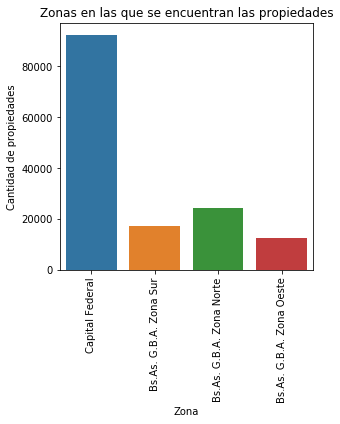

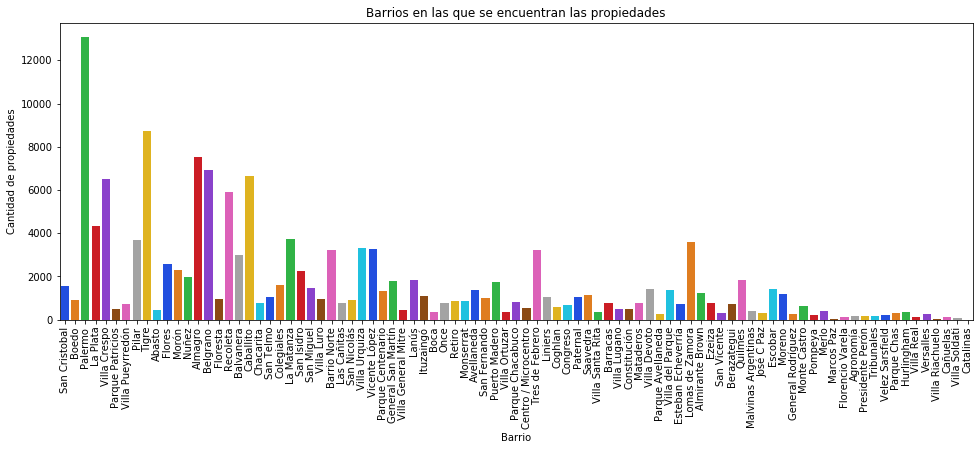

In [11]:
plt.figure(figsize = (10,10)) #Setea el tamano de la figura
plt.subplot(2,2,1)
grafico_ubicacion_prop=sns.countplot(data = datos_propiedades, x = 'l2')
grafico_ubicacion_prop.set_xticklabels(grafico_ubicacion_prop.get_xticklabels(), rotation=90)
plt.xlabel('Zona')
plt.ylabel('Cantidad de propiedades')
plt.title('Zonas en las que se encuentran las propiedades')
plt.figure(figsize = (12*3,12))
plt.subplot(2,2,3)
grafico_ubicacion_prop=sns.countplot(data = datos_propiedades, x = 'l3', palette='bright')
grafico_ubicacion_prop.set_xticklabels(grafico_ubicacion_prop.get_xticklabels(), rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Cantidad de propiedades')
plt.title('Barrios en las que se encuentran las propiedades')
plt.show()

Los graficos muestran con barras las cantidades de propiedades que hay x Zona y por Barrio respectivamente.


Al analizar el grafico **Zonas en las que se encuentran las propiedades** observo que Capital Federal es la zona con mas propiedades registradas en el dataset


Al analizar el grafico **Barrios en las que se encuentran las propiedades** observo que Palermo es el barrio con mas propiedades registradas en el dataset

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

* A continuación, realizo un filtrado del dataset para aquellas propiedades Departamento, PH y Casa y que además estén en Capital Federal.

In [12]:
nuevo_data_set=datos_propiedades[((datos_propiedades.property_type=='Departamento')|(datos_propiedades.property_type=='PH')|(datos_propiedades.property_type=='Casa'))&(datos_propiedades.l2=='Capital Federal')]
print('La cantidad de instancias y atributos del dataset respectivamente', nuevo_data_set.shape)

La cantidad de instancias y atributos del dataset respectivamente (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?    
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

* En este analisis voy a revisar los valores estadisticos de las variables

In [13]:
nuevo_data_set.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


En la impresión anterior se puede observar que sobre ciertos atributos hay valores extremos muy atípicos.
Ejemplo: En la columna superficie total su valor máximo es de 126.062 m2 cuando su media es de 112 m2. Esto es una alerta para analizar estos valores extremos que no parecen concordar o tener lógica.


* Para continuar me concentro en la variable Superficie Total a fin de analizar estos valores extremadamente grandes o atípicos.


In [14]:
nuevo_data_set.surface_total.describe()

count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64

* Genero un grafico con boxplot de los datos de superficie total sin filtrar para observar como se visualizan los datos.

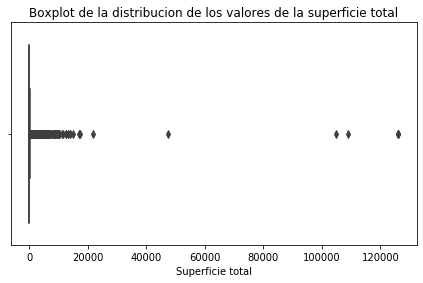

In [15]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.boxplot(data = nuevo_data_set, y = "surface_total", orient='h')
plt.xlabel('Superficie total')
plt.title('Boxplot de la distribucion de los valores de la superficie total')
plt.show()

En este Boxplot veo que existen valores extremos atipicos y no permiten visualizarlo correctamente. No me permite ver representados en la visualizacion los cuartiles y mediana de la distribucion.

Necesito encontrar un valor máximo de superficie de propiedades para filtrar aquellos valores que distorsionan la muestra con valores atípicos. 
Uso el criterio de cálculo mediante cuartiles para recortar la muestra y descartar valores atípicos. También usare este método para calcular un valor mínimo.

In [16]:
nuevo_data_set.surface_total.describe()
Q1=nuevo_data_set.surface_total.quantile(0.25)
Q3=nuevo_data_set.surface_total.quantile(0.75)
RI=Q3-Q1
maximo_filtro_superficie=(Q3+(1.5*(RI)))
minimo_filtro_superficie=(Q1-(1.5*(RI)))
mask_filtro_superficies=(nuevo_data_set.surface_total<=maximo_filtro_superficie)&(nuevo_data_set.surface_total>=minimo_filtro_superficie)

#filtro de las superficies que son valores extremos y atipicos
nuevo_data_set_filtro_superficies=nuevo_data_set[mask_filtro_superficies]

#filtro las superficies totales menores que las superficies cubiertas
mask_filtro_superficies_inconsistencia=(nuevo_data_set_filtro_superficies.surface_total>=nuevo_data_set_filtro_superficies.surface_covered)
nuevo_data_set_filtro_superficies=nuevo_data_set_filtro_superficies[mask_filtro_superficies_inconsistencia]

En estas líneas anteriores filtre el dataset de los valores atípicos máximos y mínimos para el atributo Superficie total. Además, filtre aquellos casos que la superficie cubierta es mayor a la superficie total (situación que no es lógica).

* Ahora realizo un gráfico Boxplot de los datos filtrados.

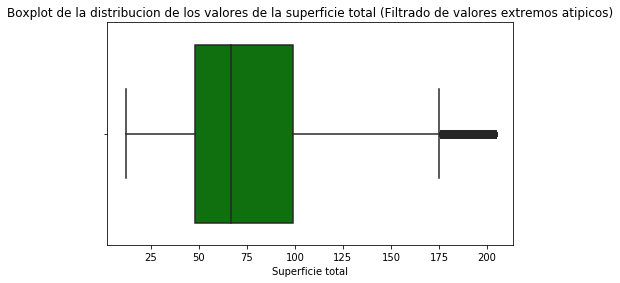

In [17]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.boxplot(data = nuevo_data_set_filtro_superficies, y = "surface_total", color='g', orient='h')
plt.xlabel('Superficie total')
plt.title('Boxplot de la distribucion de los valores de la superficie total (Filtrado de valores extremos atipicos)')
plt.show()

En este último Boxplot observo una mejora en la visualización por acción del filtrado de valores extremos atípicos. Puedo analizar mucho mejor la distribución de los datos para las superficies totales de las propiedades. Puedo ver la mediana, percentiles 25 y 75 ayudandome a entender la distribución de la variable Superficie Total (surface_total).

* Seguido imprimo la información estadística de cada uno de los atributos de las propiedades.

In [18]:
nuevo_data_set_sin_coordenadas=nuevo_data_set_filtro_superficies.drop(columns=['lat','lon'])
print('Valores estadisticos de las variables del dataset','\n')
print(nuevo_data_set_sin_coordenadas.describe(),'\n')
print('Cantidad de filas y columnas del nuevo dataset filtrado y sin las columnas coordenadas', nuevo_data_set_sin_coordenadas.shape)

Valores estadisticos de las variables del dataset 

              rooms      bedrooms     bathrooms  surface_total  \
count  75114.000000  75114.000000  74352.000000   75114.000000   
mean       2.823375      1.864726      1.443001      78.261336   
std        1.078877      0.908018      0.706983      39.913959   
min        1.000000      0.000000      1.000000      12.000000   
25%        2.000000      1.000000      1.000000      48.000000   
50%        3.000000      2.000000      1.000000      67.000000   
75%        4.000000      2.000000      2.000000      99.000000   
max       21.000000     15.000000     14.000000     204.000000   

       surface_covered         price  
count     75114.000000  7.511400e+04  
mean         69.277325  2.148287e+05  
std          34.731893  1.945783e+05  
min           1.000000  6.000000e+03  
25%          43.000000  1.200000e+05  
50%          60.000000  1.700000e+05  
75%          85.000000  2.550000e+05  
max         204.000000  3.243423e+07   



Veo que en el dataset ya no hay atributos (columnas) con valores extremos atípicos. Esta listo para poder analizar las distribuciones y correlaciones de a pares entre las variables que componen este dataset.

* Realizo un gráfico con la función **pairplot**. Podre visualizar todas las relaciones de las variables de a pares.

**Nota:** En el paso anterior elimine del dataset las coordenadas lat y long para que al graficar el Pairplot, sea más clara la información exhibida.

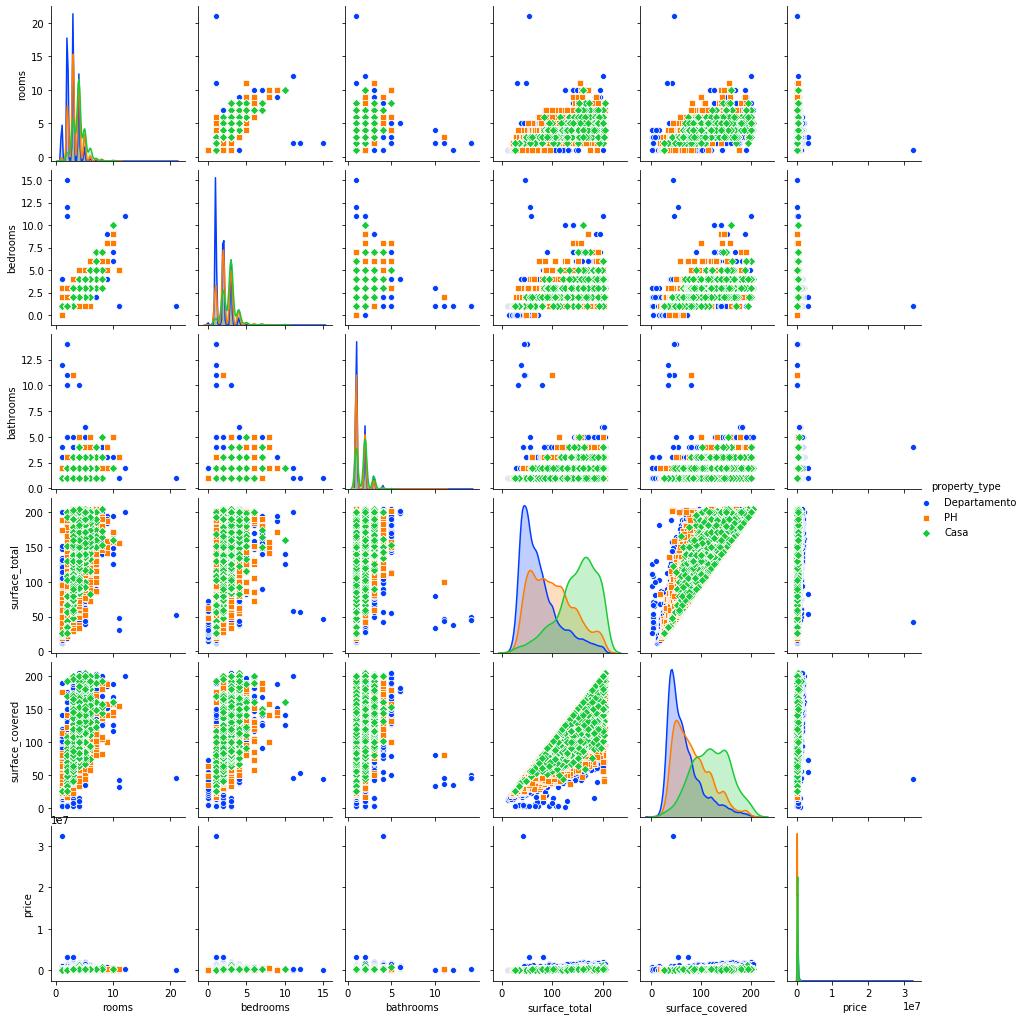

In [19]:
g=sns.pairplot(nuevo_data_set_sin_coordenadas, hue='property_type',aspect=1, palette='bright',markers=['o', 's', 'D'])
g.fig.set_size_inches(14,14)
plt.show()

En este grafico Pairplot observo las distribuciones de valores de a pares de las variables. Además, están discriminadas por tipo de propiedad (Departamento=Azul, PH=Naranja, Casa=Verde). Al analizar la fila o columna del grafico, en la variable 'Precio', puedo comenzar a inferir como serán las correlaciones de este con las demás variables (rooms, bedrooms, bathrooms, surface_total, surface_covered).

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Para estudiar cuales son las mejores variables predictoras para predecir los precios de las propiedades, analizare las correlaciones de la variable Precio con de las demás variables y lo hare para cada tipo de propiedad. También graficare las matrices de correlación para visualizar mejor los resultados.

* Imprimo los cálculos de correlación para el tipo de propiedad Departamento.

In [20]:
mask_Departamento=nuevo_data_set_sin_coordenadas.property_type=='Departamento'
print('Departamento')
nuevo_data_set_sin_coordenadas[mask_Departamento].corr()

Departamento


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.926159,0.547471,0.755515,0.785159,0.390687
bedrooms,0.926159,1.000000,0.557434,0.740790,0.770970,0.379315
bathrooms,0.547471,0.557434,1.000000,0.688066,0.699665,0.515572
surface_total,0.755515,0.740790,0.688066,1.000000,0.950570,0.595003
surface_covered,0.785159,0.770970,0.699665,0.950570,1.000000,0.607377
price,0.390687,0.379315,0.515572,0.595003,0.607377,1.000000


* Grafico su matriz de correlacion.

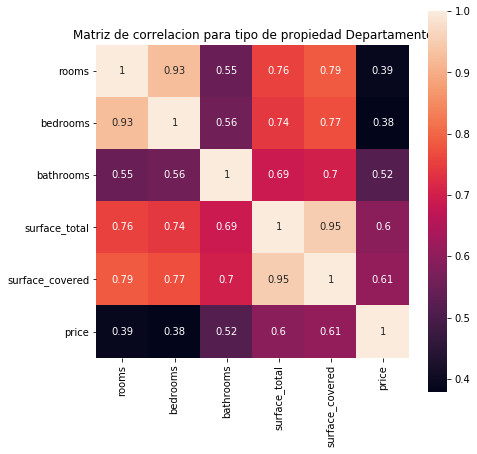

In [21]:
data=nuevo_data_set_sin_coordenadas[mask_Departamento]
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Matriz de correlacion para tipo de propiedad Departamento')
plt.show()

* Realizo lo mismo que hice para Departamento pero ahora con tipo de propiedad PH. Imprimo los calculos de correlacion

In [22]:
mask_PH=nuevo_data_set_sin_coordenadas.property_type=='PH'
print('PH')
nuevo_data_set_sin_coordenadas[mask_PH].corr()

PH


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.941288,0.464899,0.658066,0.736595,0.530736
bedrooms,0.941288,1.000000,0.453348,0.631906,0.730961,0.525249
bathrooms,0.464899,0.453348,1.000000,0.464502,0.551642,0.514711
surface_total,0.658066,0.631906,0.464502,1.000000,0.838105,0.646920
surface_covered,0.736595,0.730961,0.551642,0.838105,1.000000,0.717989
price,0.530736,0.525249,0.514711,0.646920,0.717989,1.000000


* Grafico su matriz de correlacion.

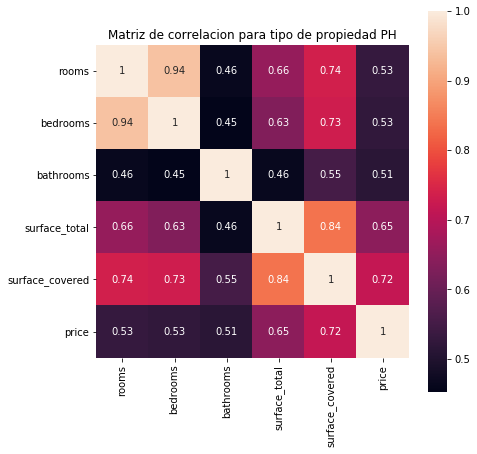

In [23]:
data=nuevo_data_set_sin_coordenadas[mask_PH]
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Matriz de correlacion para tipo de propiedad PH')
plt.show()

* Imprimo los datos de correlacion para el tipo de propiedad Casa

In [24]:
mask_Casa=nuevo_data_set_sin_coordenadas.property_type=='Casa'
print('Casa')
nuevo_data_set_sin_coordenadas[mask_Casa].corr()

Casa


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.857382,0.347158,0.498201,0.524993,0.339488
bedrooms,0.857382,1.000000,0.346929,0.437576,0.479181,0.274258
bathrooms,0.347158,0.346929,1.000000,0.273994,0.361727,0.375885
surface_total,0.498201,0.437576,0.273994,1.000000,0.801714,0.465464
surface_covered,0.524993,0.479181,0.361727,0.801714,1.000000,0.487467
price,0.339488,0.274258,0.375885,0.465464,0.487467,1.000000


* Grafico su matriz de correlacion.

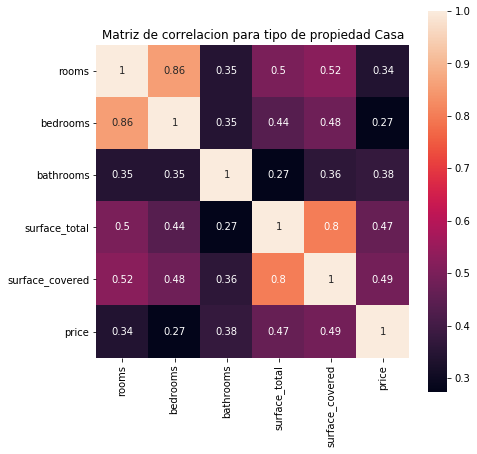

In [25]:
data=nuevo_data_set_sin_coordenadas[mask_Casa]
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Matriz de correlacion para tipo de propiedad Casa')
plt.show()

Estudiando las correlaciones obtenidas y las gráficas de Matriz de correlación se desprende que las mejores variables para predecir el precio son surface_covered, surface_total, rooms, bedrooms y bathrooms. Todos estos atributos tienen correlación con el precio de la propiedad. Al cambiar estas variables, pueden modificar el precio de la unidad.


**Para el caso particular de propiedades tipo Departamento** la mejor variable para predecir un precio es surface_total (Superficie total). El atributo surface_covered tambien tiene similar correlación con el precio que surface_total, pero ambas serian redundantes ya que están fuertemente correlacionadas. Al analizarlas podemos ver que entre ellas existe una correlación de 0,95. 

##### Diferencias que encuentro según el tipo de propiedad
* Para las propiedades **Departamentos** las variables de máxima correlación con el precio son superficie total, superficie cubierta, cantidad de baños y cantidad de ambientes.
* Para las propiedades **PH** las variables de máxima correlación con el precio son superficie total, superficie cubierta, cantidad de ambientes y cantidad de habitaciones.
* Para las propiedades **Casa** las variables de máxima correlación con el precio son superficie total, cubierta y la cantidad de baños.

### Respuesta al Desafío

La pregunta que me propongo analizar con la informacion del Dataset es: 
* Cual es la zona donde mas PHs hay?

Para analizar esta pregunta realizo un grafico que cuente la cantidad de este tipo de propiedades (PH) por zonas

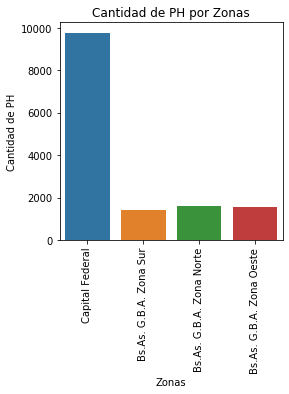

In [26]:
plt.figure(figsize = (4,4))
plt.subplot(1,1,1)
datos_PH=datos_propiedades[datos_propiedades.property_type=='PH']
grafico_cant_PH_x_barrio=sns.countplot(data = datos_PH, x = 'l2')
grafico_cant_PH_x_barrio.set_xticklabels(grafico_cant_PH_x_barrio.get_xticklabels(), rotation=90)
plt.xlabel('Zonas')
plt.ylabel('Cantidad de PH')
plt.title('Cantidad de PH por Zonas')
print('\n')

Respondiendo a la pregunta planteada Capital Federal es la zona donde mas PH's hay

* Cual es el barrio dentro de Capital Federal donde mas PHs hay?

Para responder a esta pregunta realizo un grafico que cuente la cantidad de este tipo de propiedades (PH) por barrios

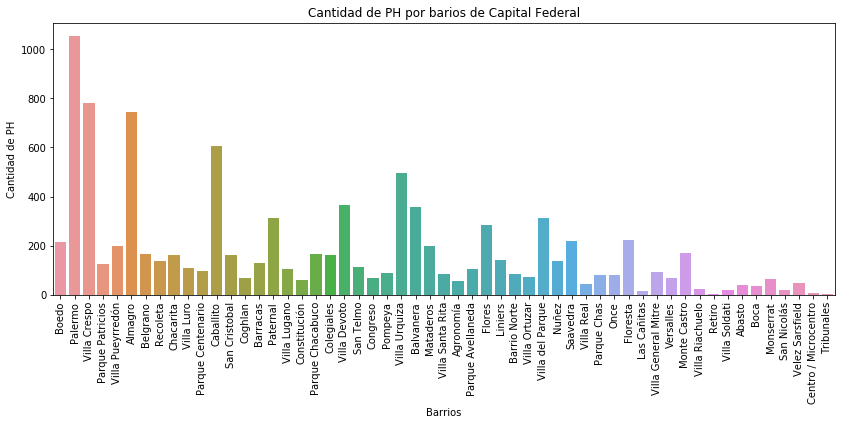

In [27]:
plt.figure(figsize = (14,5))
datos_PH=datos_propiedades[datos_propiedades.property_type=='PH']
datos_PH_Capital_Federal=datos_PH[datos_PH.l2=='Capital Federal']
grafico_cant_PH_x_barrio=sns.countplot(data = datos_PH_Capital_Federal, x = 'l3')
grafico_cant_PH_x_barrio.set_xticklabels(grafico_cant_PH_x_barrio.get_xticklabels(), rotation=90)
plt.xlabel('Barrios')
plt.ylabel('Cantidad de PH')
plt.title('Cantidad de PH por barios de Capital Federal')
print('\n')

Respondiendo a la pregunta planteada, Palermo es el barrio donde mas PH's hay

Analizando los gráficos para responder a las preguntas del desafío, veo que Capital Federal es la zona que más PH's dispone. La información podría estar sesgada porque podría ser que las zonas de gran buenos aires no estén cargados todos los PH's que hay. En la zona Norte y Oeste parecen haber similar cantidad de este tipo de propiedades. Habría que conocer cuál es el criterio para el registro de este tipo de propiedades, si todas han sido registradas, si tienen algún criterio de registro. 
* ¿Cuán generalizable es la respuesta obtenida?
* ¿Necesitas información complementaria?
* ¿Cómo la obtendrías?

Para generalizar habría que conocer como han sido relevados estos datos (Criterios, filtros).
Conocer cómo se realizó la toma de datos ayudaría a decidir cómo esta información puede ser útil o no por sesgos.

Trataría de contactarme con la gente de Properati y recibir información de cómo fueron tomados los datos, cuáles fueron los parámetros planteados para registrar la información.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

Cargo nuevamente el dataset.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

* Filtro por propiedades en Capital Federal

In [29]:
data=data[(data.l2=='Capital Federal')]

* Filtro por tipo de propiedad Departamento, PH y Casa

In [30]:
data=data[((data.property_type=='Departamento')|(data.property_type=='PH')|(data.property_type=='Casa'))]

* Filtro las propiedades con superficie total entre 15 m2 y 1000 m2

In [31]:
data=data[((data.surface_total>15)&(data.surface_total<1000))]

* Filtro propiedades con valor menor a 4.000.000 USD

In [32]:
data=data[(data.price<4000000)]

* Filto los atributos rooms, bedrooms, bathrooms, surface_total, surface_covered y price

In [33]:
fields=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
data_filtro_atributos=data[fields]

* Ahora elimino las instancias que tienen faltante de valores en algun atributo

In [34]:
data_sin_faltantes=data_filtro_atributos.dropna()

* Imprimo las 5 primeras instancias así reviso la estructura del dataset filtrado. Además imprimo cantidad de filas y columnas del dataset y los valores faltantes por cada columna.

In [35]:
print(data_sin_faltantes.head(5),'\n')
print('Cantidad de filas y columnas :',data_sin_faltantes.shape,'\n')
print('Valores faltantes por columna')
data_sin_faltantes.isna().sum()

   rooms  bedrooms  bathrooms  surface_total  surface_covered     price
0    7.0       7.0        2.0          140.0            140.0  153000.0
1    2.0       1.0        2.0           70.0             58.0  159000.0
2    2.0       1.0        1.0           45.0             45.0  125000.0
3    2.0       1.0        1.0           85.0             50.0  295000.0
5    2.0       1.0        1.0           56.0             56.0  150000.0 

Cantidad de filas y columnas : (80993, 6) 

Valores faltantes por columna


rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Con lo hecho hasta este punto se cumplen los pasos de filtrado que solicitaba el enunciado (Tipo de propiedades Departamentos, PH o Casa, en Capital Federal con superficie entre 15m2 y 1000 m2 y precio menor a USD 4.000.000).

* Ahora preparo el dataset que utilizare para entrenar y testear los modelos de regresión. Filtro por tipo de propiedad Departamento como lo pide el enunciado. Estos datos serán de Departamentos en Capital Federal con superficie entre 15m2 y 1000 m2 y precio menor a USD 4.000.000 y sin valores faltantes.

In [36]:
data=data[(data.property_type=='Departamento')]
data=data[fields]
data.dropna(inplace=True)

In [37]:
print('Cantidad de filas y columnas:', data.shape)

Cantidad de filas y columnas: (69291, 6)


* Realizo graficas con Boxplot para ver como es el comportamiento de los datos

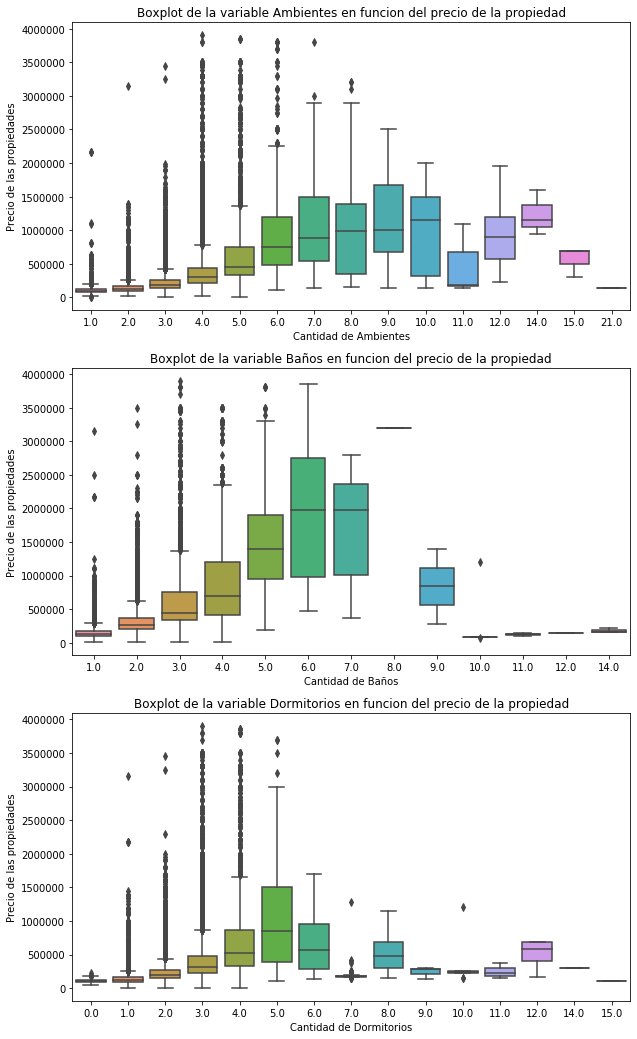

In [38]:
plt.figure(figsize = (10,18))
plt.subplot(3,1,1)
sns.boxplot(data = data, x = data['rooms'], y = "price")
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio de las propiedades')
plt.title('Boxplot de la variable Ambientes en funcion del precio de la propiedad')

plt.subplot(3,1,2)
sns.boxplot(data = data, x = data['bathrooms'], y = "price")
plt.xlabel('Cantidad de Baños')
plt.ylabel('Precio de las propiedades')
plt.title('Boxplot de la variable Baños en funcion del precio de la propiedad')

plt.subplot(3,1,3)
sns.boxplot(data = data, x = data['bedrooms'], y = "price")
plt.xlabel('Cantidad de Dormitorios')
plt.ylabel('Precio de las propiedades')
plt.title('Boxplot de la variable Dormitorios en funcion del precio de la propiedad')
plt.show()

En los gráficos (Boxplot) anteriores se ven que, para algunos casos de la variable Ambientes, Baños o Habitaciones las distribuciones de la variable precio podrían contener valores atípicos. Se aprecia que en varios casos hay valores de precio que caen muy por fuera de los whiskers de las cajas y estos podrían distorsionar las distribuciones.

* Reviso las correlaciones de este dataset

In [39]:
data.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.920645,0.608382,0.733551,0.294928,0.523633
bedrooms,0.920645,1.000000,0.616492,0.694633,0.281436,0.486855
bathrooms,0.608382,0.616492,1.000000,0.706733,0.277387,0.659083
surface_total,0.733551,0.694633,0.706733,1.000000,0.372295,0.808943
surface_covered,0.294928,0.281436,0.277387,0.372295,1.000000,0.323526
price,0.523633,0.486855,0.659083,0.808943,0.323526,1.000000


* A continuación genero la gráfica de la matriz de correlación para analizar la información entre las variables atributos de la propiedad y su precio. Esta representación me ayudara en forma visual a identificar cuáles son las mejores variables predictoras para el valor del precio.

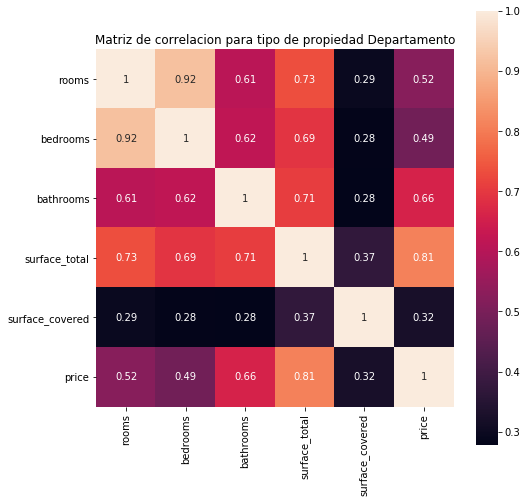

In [40]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, annot=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Matriz de correlacion para tipo de propiedad Departamento')
plt.show()

Veo que las mejores variables predictoras seran Superficie total con 0,81 de correlacion con la variable precio, Baños con 0,66 de correlacion, Ambientes con 0,52 y Dormitorios con 0,49.

* Importo las librerias para trabajar en los modelos Regresion lineal, Arbol de decision y Vecino Cercano

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

* Armo la selección de datos para X e y. 
Seleccionare las variables que mayor correlación presenten con el precio de la propiedad. Analizando la matriz de correlación veo que estas son: **rooms,bedrooms,bathrooms,surface_total**

**Nota:** No tomare en cuenta la variable superficie cubierta (surface_covered) porque tiene una baja correlación con el precio corr=0,32 y no sera tan buena predictora como las otras variables que poseen mayor valor.

In [43]:
fields_X=['surface_total','bathrooms','rooms', 'bedrooms']
X=data[fields_X]
fields_y=['price']
y=data[fields_y]

* Grafico las variables bathrooms y surface_total (las dos variables con más alta correlación con el precio) en función del precio de la propiedad. Esto nos mostrara como es la distribución en una gráfica de 3D.

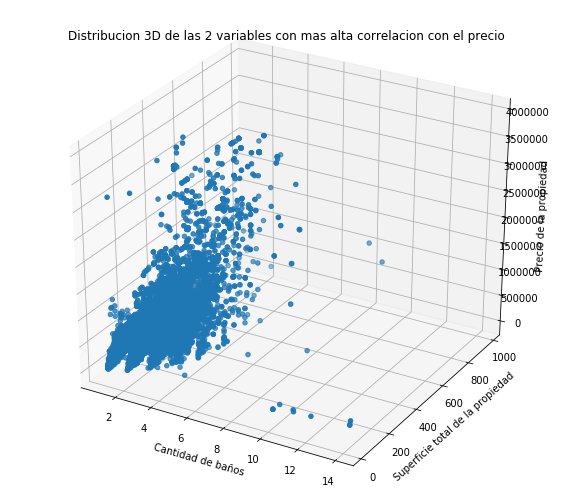

In [44]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (10,9))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('Cantidad de baños')
    ax.set_ylabel('Superficie total de la propiedad')
    ax.set_zlabel('Precio de la propiedad')
    ax.set_title('Distribucion 3D de las 2 variables con mas alta correlacion con el precio')

plot_3d_scatter(X['bathrooms'],X['surface_total'], y, ax=None, fig = None)

* Genero los 3 modelos modelos con valores de Hiperparametros por defecto

In [45]:
lineal_tasador_propiedades = LinearRegression()
arbol_tasador_propiedades = DecisionTreeRegressor(max_depth=4, random_state=42)
vecino_cercano_tasador_propiedades=KNeighborsRegressor(n_neighbors=1)

* Separo datos de entrenamiento y testing e imprimo sus tamaños.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(48503, 4) (20788, 4) (48503, 1) (20788, 1)


* Entreno los 3 modelos con el set de datos armado arriba X e y

In [47]:
lineal_tasador_propiedades.fit(X_train,y_train)
arbol_tasador_propiedades.fit(X_train,y_train)
vecino_cercano_tasador_propiedades.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

* Para evaluar la precisión de las predicciones de los modelos voy a utilizar la métrica RMSE (representa la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor predicho por el modelo). A menor valor de esta métrica mas precisión tendrá el modelo en sus predicciones. 

Con el siguiente código, mediante un ciclo for, entreno cada uno de los 3 modelos con X-train y los testeo con X-test. Luego genero los histogramas de la métrica RMSE en train y test para cada uno de ellos. Ademas, imprimo los valores de la métrica RMSE para ambos set de datos y genero un gráfico de dispersión scatter para visualizar la distribución entre los valores que el modelo predice y_pred_test y el valor real de y_test.

Modelo: Benchmark
Raíz del error cuadrático medio en Train: 177628.73974361134
Raíz del error cuadrático medio en Test: 164296.0861106715


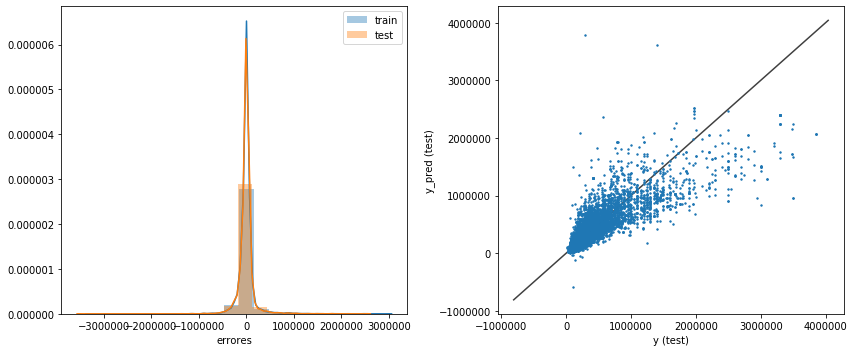

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 168440.34237031412
Raíz del error cuadrático medio en Test: 163028.16068231515


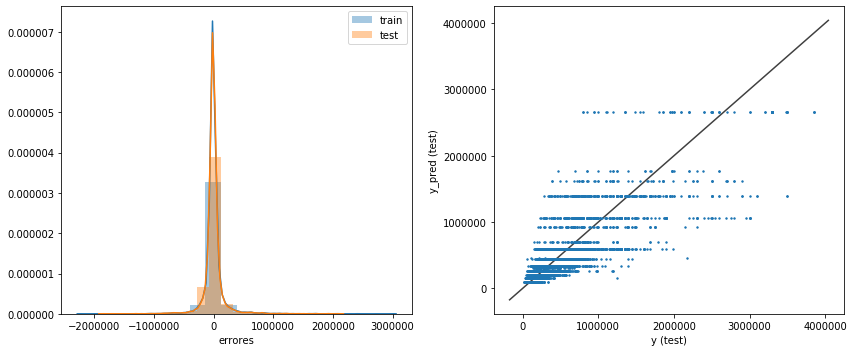

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 122921.80816173612
Raíz del error cuadrático medio en Test: 166573.12376004507


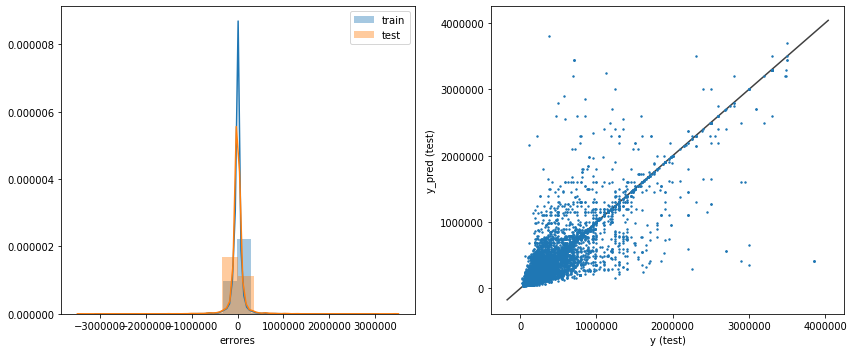

In [48]:
modelos = ['Benchmark','Árbol de Decisión','Vecinos más cercanos']
for i, model in enumerate([lineal_tasador_propiedades, arbol_tasador_propiedades, vecino_cercano_tasador_propiedades]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    if model== ('arbol_tasador_propiedades'):
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        sns.distplot(y_train['price'] - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test['price']- y_test_pred, bins = 20, label = 'test')        
    else:
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred.reshape(len(y_train_pred),1), bins = 20, label = 'train')
        sns.distplot(y_test- y_test_pred.reshape(len(y_test_pred),1), bins = 20, label = 'test')
        
    plt.xlabel('errores')
    plt.legend()    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
            ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

Las 3 graficas anteriores, corresponden a histogramas de las comparaciones entre errores RMSE para train y test para las predicciones realizadas por los 3 modelos con Hiperparametros por defecto (Regresión lineal - Benchmark, Arbol de decisión y Vecinos más cercanos). 
Al realizar un primer análisis veo que en el set de Test el modelo que predice el precio con menor raíz de error cuadrático medio RMSE es el modelo de Árbol de decisión.

* Con el fin de mejorar el desempeño de los modelos analizare cuales serán los mejores hiperparamentros para Árbol de decisión (max_depth) y Vecinos más Cercanos (n_neighbors). Para resolver realizo graficas de RMSE test versus RMSE train con el fin buscar cuales son los mejores hiperparametros que minimicen la metrica RMSE de las predicciones, buscando ademas minimizar el under u over fitting.

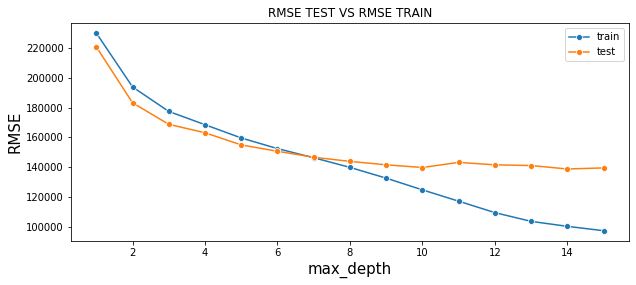

In [49]:
size=[]
rmse_tree_test=[]
rmse_tree_train=[]
rmse_diff=[]
valores=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
n_mejor=10
for n in valores :
    size.append(n)
    tree_regressor = DecisionTreeRegressor(max_depth=n, random_state=100)
    tree_regressor.fit(X_train, y_train)
    y_train_pred_tree =tree_regressor.predict(X_train)
    y_test_pred_tree = tree_regressor.predict(X_test)
    rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
    rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    dif=rmse_test_tree-rmse_train_tree
    rmse_tree_test.append(rmse_test_tree)
    rmse_tree_train.append(rmse_train_tree)
    rmse_diff.append(dif)
data_rmse=pd.DataFrame({'profundidad':size,'rmse_tree_train':rmse_tree_train, 'rmse_tree_test':rmse_tree_test,'rmse_diff':rmse_diff})
f, ax = plt.subplots(figsize=(10, 4))
ax1=sns.lineplot(x = "profundidad", y = "rmse_tree_train", data = data_rmse, marker="o")
ax1=sns.lineplot(x = "profundidad", y = "rmse_tree_test", data = data_rmse, marker="o")
ax1.legend(["train","test"])
plt.title("RMSE TEST VS RMSE TRAIN", fontsize = 12)
plt.xlabel("max_depth", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.show()

Este grafico muestra la evolución del error RMSE a medida que aumenta el hiperparametro max_depth entre los valores 1 y 15 para train y test. 

Al analizar las curvas para este modelo Árbol de decisión veo que el mejor hiperparametro es max_depth=7 porque minimiza la métrica RMSE para ambas predicciones y evita el underfitting y overfitting ya que ambos errores en set de test y train son casi iguales.

* Ahora realizo el mismo análisis de métrica RMSE para el modelo de Vecinos más cercanos modificando el Hiperparametro n_neighbors (número de vecinos) entre los valores 1 y 20.

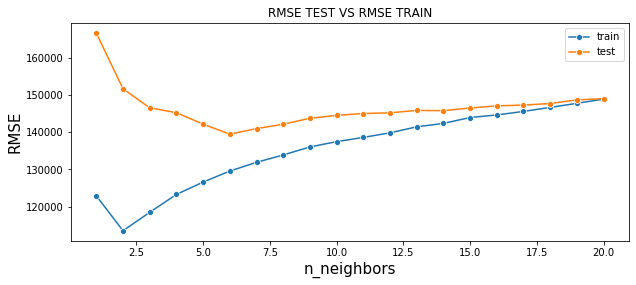

In [50]:
size=[]
rmse_knn_test=[]
rmse_knn_train=[]
rmse_diff=[]
valores=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
n_mejor=10
for n in valores :
    size.append(n)
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train, y_train)
    y_train_pred_knn =knn_regressor.predict(X_train)
    y_test_pred_knn = knn_regressor.predict(X_test)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    dif=rmse_test_knn-rmse_train_knn
    rmse_knn_test.append(rmse_test_knn)
    rmse_knn_train.append(rmse_train_knn)
    rmse_diff.append(dif)
data_rmse=pd.DataFrame({'profundidad':size,'rmse_knn_train':rmse_knn_train, 'rmse_knn_test':rmse_knn_test,'rmse_diff':rmse_diff})
f, ax = plt.subplots(figsize=(10, 4))
ax1=sns.lineplot(x = "profundidad", y = "rmse_knn_train", data = data_rmse, marker="o")
ax1=sns.lineplot(x = "profundidad", y = "rmse_knn_test", data = data_rmse, marker="o")
ax1.legend(["train","test"])
plt.title("RMSE TEST VS RMSE TRAIN", fontsize = 12)
plt.xlabel("n_neighbors", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.show()

Este grafico muestra la evolución del error RMSE a medida que aumenta el hiperparametro n_neighbors entre los valores 1 y 20 para las predicciones para los datos en train y test.

Al analizar estas curvas estimo que el mejor hiperparametro es n_neighbors=6 porque minimiza la métrica RMSE para las predicciones en test. Ademas se minimiza el underfitting y overfitting ya que ambos errores en set de test y train tienden a aproximarse entre si.

* Ahora vuelvo a generar los modelos para Arbol de decision y Vecino mas cercano con los hiperparametros seleccionados y observare nuevamente la metrica RMSE para decidir que modelo aproxima con menor error sobre los datos de Test.
 * **max_depth=7**
 * **n_neighbors=6**

In [51]:
arbol_tasador_propiedades = DecisionTreeRegressor(max_depth=7, random_state=42)
vecino_cercano_tasador_propiedades=KNeighborsRegressor(n_neighbors=6)

* Entreno los 2 modelos con los datos X_train e y_train

In [52]:
arbol_tasador_propiedades.fit(X_train,y_train)
vecino_cercano_tasador_propiedades.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

* Realizo las predicciones para set de Train y Test para ambos modelos (el modelo Benchmark será el mismo que fue graficado anteriormente por ser un modelo que carece de Hiperparametros y solo servirá como guía y punto de comparación para evaluar Arbol de decision y Vecino mas cercano). Luego genero los histogramas de la métrica de RMSE y las imprimo, para analizar cual modelo aproximará mejor las predicciones en el set de Test.

Modelo: Benchmark
Raíz del error cuadrático medio en Train: 177628.73974361134
Raíz del error cuadrático medio en Test: 164296.0861106715


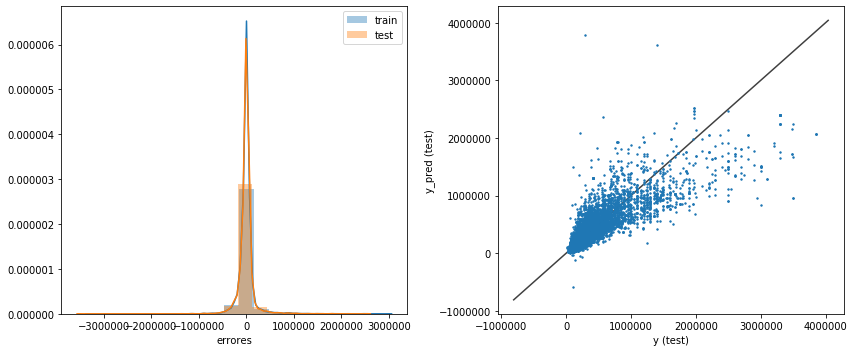

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 146235.44210555594
Raíz del error cuadrático medio en Test: 146574.4824095149


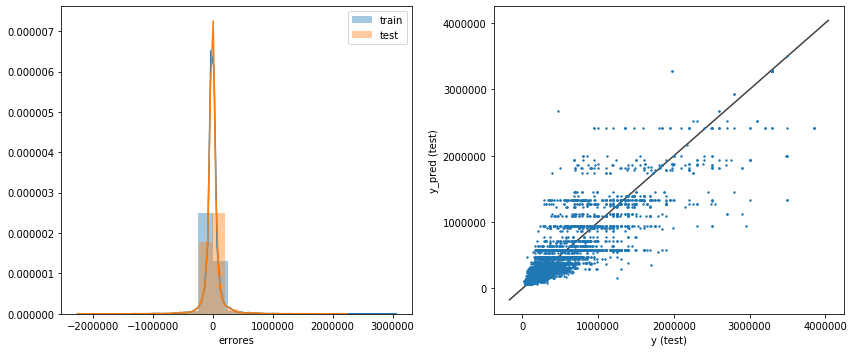

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 129573.51315104477
Raíz del error cuadrático medio en Test: 139471.80241648463


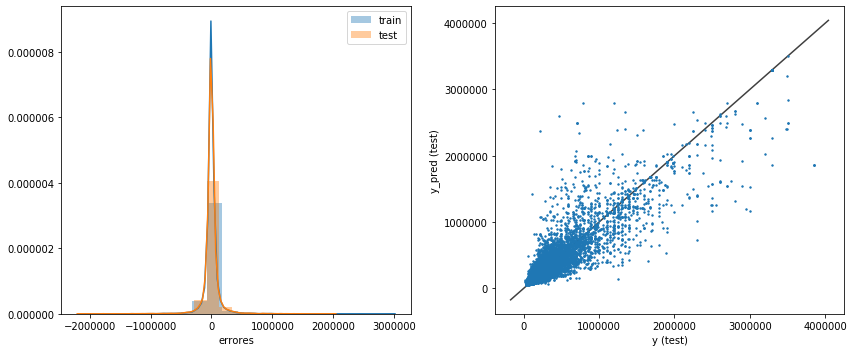

In [53]:
modelos = ['Benchmark','Árbol de Decisión','Vecinos más cercanos']
for i, model in enumerate([lineal_tasador_propiedades, arbol_tasador_propiedades, vecino_cercano_tasador_propiedades]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    if model== ('arbol_tasador_propiedades'):
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        sns.distplot(y_train['price'] - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test['price']- y_test_pred, bins = 20, label = 'test')        
    else:
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred.reshape(len(y_train_pred),1), bins = 20, label = 'train')
        sns.distplot(y_test- y_test_pred.reshape(len(y_test_pred),1), bins = 20, label = 'test')
        
    plt.xlabel('errores')
    plt.legend()    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
            ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

Luego de analizar nuevamente estas gráficas para los modelos optimizados comparo de ambos los valores de la raiz de sus errores cuadráticos medios y concluyo que el mejor modelo es **Vecino más cercano** (regresión) porque arroja un menor valor de la métrica RMSE para el set de datos de Test comparado con RMSE para el set de test en Árbol de decisión. 
* RMSE para set Test Vecino más Cercano = 139.471,80 **(menor)**
* RMSE para set Test Árbol de decisión  = 146.574,48

Este valor RMSE por ser la raiz cuadrada del error cuadrático medio tiene las mismas unidades que la variable a predecir (En nuestro caso esta métrica representara USD y la variable a predecir "Precio" tambien está en USD). Por ende, pueden ser comparadas para saber cuan desplazada esta la predicción obtenida del valor real.

#### Realizando una crítica a la metodología utilizada.
Durante la preparación de los datos, realice filtros sobre el dataset recortando información que podría haber sido de utilidad para la predicción en los modelos. O por el contrario, pudieron quedar datos que fueran atípicos y distorsionan las distribuciones. Ejemplo: se realizaron filtros arbitrarios para superficie total y precio de propiedades. 

Tambien, se eliminaron instancias que tenían algún dato faltante y que podrían haber contribuido a enriquecer más la información (Utilizar algun algoritmo para completar el registro faltante de la instancia).

También vi, que de acuerdo al objetivo que debía resolver el problema (predecir el precio de propiedades Departamentos en Capital Federal), el dataset provisto por Properati tenía información de más. Contenía otro tipo de propiedades y en otras zonas a las de interés. Esto hace que sea más trabajo llegar a un dataset filtrado útil para entrenar y evaluar los modelos.

Además, note que al separar los datos en train y test se utiliza una función (train_test_split) que realiza la separación en forma aleatoria, esto podría hacer que las distribuciones de cada set de entrenamiento y el de validación, no estén equilibradas estadísticamente. Esto puede generar que los resultados que obtengamos en las predicciones no sean independientes de la partición entre datos de entrenamiento y de validación.
Deberia realizarse alguna separacion que permita tener distibuciones similares entre train y test.

Fin.